In [1]:
import matplotlib.pyplot as plt
import numpy as np

from simladb import query, simladbX, DB_judge1, DB_judge2, j2spec
from simla_utils import fmt_j2spec
from simla_variables import SimlaVar

/Users/grant/anaconda3/envs/simlaenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
shardquery = query(simladbX.select(DB_judge1.BACKSUB_PHOT, DB_judge2.F_MEDIAN, *j2spec,
                                  DB_judge1.CHNLNUM, DB_judge1.SUBORDER, DB_judge1.SHARD).limit(100000))
j1s, j2s, j2_specs, chnls, subs, shardids = \
    shardquery['BACKSUB_PHOT'].to_numpy(), shardquery['F_MEDIAN'].to_numpy(), fmt_j2spec(shardquery), \
    shardquery['CHNLNUM'].to_numpy(), shardquery['SUBORDER'].to_numpy(), shardquery['SHARD'].to_numpy()

In [3]:
sl_n_shards = SimlaVar().sl_n_shards
ll_n_shards = SimlaVar().ll_n_shards
plotpath = SimlaVar().simlapath+'validations/plots/'

# Judge 1
Note: in the first plot the x-axis is log, so negative data is excluded. In the second plot, we are zooming-in on the x-axis.

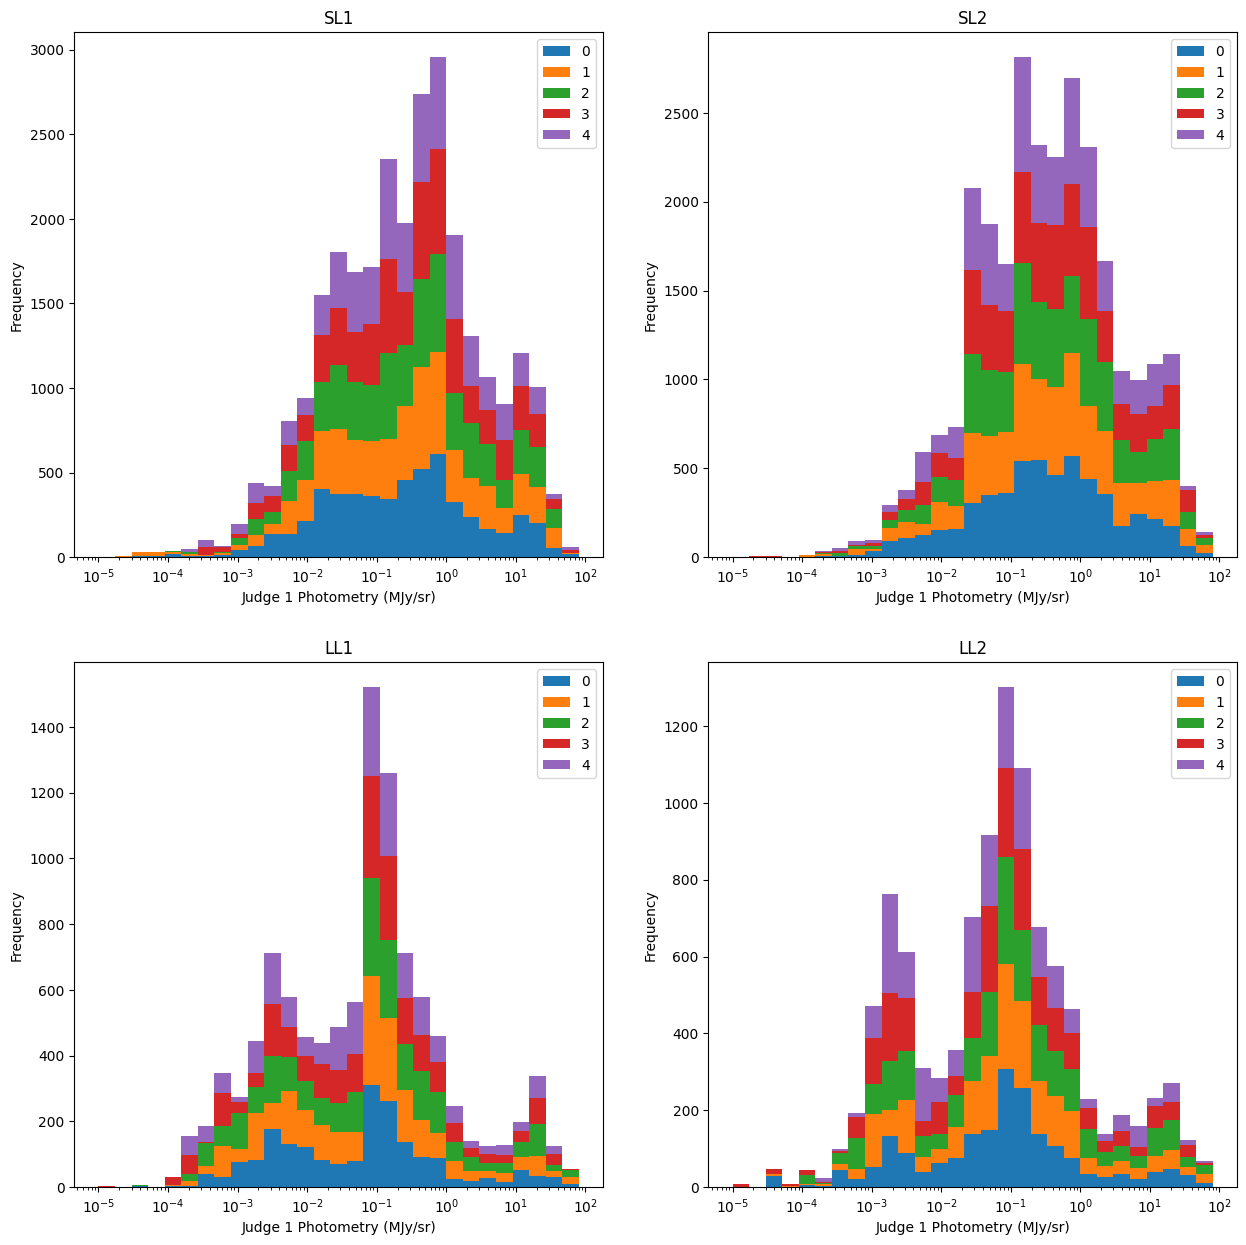

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
bin_num = 30

plt.subplot(2, 2, 1)
mj1s = [j1s[np.where((j1s>0)&(chnls==0)&(subs==1)&(shardids==i))] for i in range(sl_n_shards)]
pos_j1 = j1s[np.where(j1s>0)]
bins = 10**np.linspace(np.log10(np.min(pos_j1)), \
                       np.log10(np.max(pos_j1)), bin_num)
hist, edges = np.histogram(pos_j1, bins=bins)
bin_centers = [np.mean((edges[i],edges[i+1])) for i in range(len(edges)-1)]
plt.hist(mj1s, bins=bins, stacked=True, label=range(sl_n_shards))
plt.legend()
plt.title('SL1')
plt.gca().set_xscale("log")
plt.ylabel('Frequency')
plt.xlabel('Judge 1 Photometry (MJy/sr)')

plt.subplot(2, 2, 2)
mj1s = [j1s[np.where((j1s>0)&(chnls==0)&(subs==2)&(shardids==i))] for i in range(sl_n_shards)]
pos_j1 = j1s[np.where(j1s>0)]
bins = 10**np.linspace(np.log10(np.min(pos_j1)), \
                       np.log10(np.max(pos_j1)), bin_num)
hist, edges = np.histogram(pos_j1, bins=bins)
bin_centers = [np.mean((edges[i],edges[i+1])) for i in range(len(edges)-1)]
plt.hist(mj1s, bins=bins, stacked=True, label=range(sl_n_shards))
plt.legend()
plt.title('SL2')
plt.gca().set_xscale("log")
plt.ylabel('Frequency')
plt.xlabel('Judge 1 Photometry (MJy/sr)')

plt.subplot(2, 2, 3)
mj1s = [j1s[np.where((j1s>0)&(chnls==2)&(subs==1)&(shardids==i))] for i in range(ll_n_shards)]
pos_j1 = j1s[np.where(j1s>0)]
bins = 10**np.linspace(np.log10(np.min(pos_j1)), \
                       np.log10(np.max(pos_j1)), bin_num)
hist, edges = np.histogram(pos_j1, bins=bins)
bin_centers = [np.mean((edges[i],edges[i+1])) for i in range(len(edges)-1)]
plt.hist(mj1s, bins=bins, stacked=True, label=range(ll_n_shards))
plt.legend()
plt.title('LL1')
plt.gca().set_xscale("log")
plt.ylabel('Frequency')
plt.xlabel('Judge 1 Photometry (MJy/sr)')

plt.subplot(2, 2, 4)
mj1s = [j1s[np.where((j1s>0)&(chnls==2)&(subs==2)&(shardids==i))] for i in range(ll_n_shards)]
pos_j1 = j1s[np.where(j1s>0)]
bins = 10**np.linspace(np.log10(np.min(pos_j1)), \
                       np.log10(np.max(pos_j1)), bin_num)
hist, edges = np.histogram(pos_j1, bins=bins)
bin_centers = [np.mean((edges[i],edges[i+1])) for i in range(len(edges)-1)]
plt.hist(mj1s, bins=bins, stacked=True, label=range(ll_n_shards))
plt.legend()
plt.title('LL2')
plt.gca().set_xscale("log")
plt.ylabel('Frequency')
plt.xlabel('Judge 1 Photometry (MJy/sr)')

plt.savefig(plotpath+'judge_photometry/judge1_histograms_log.pdf', format='pdf')
plt.show()

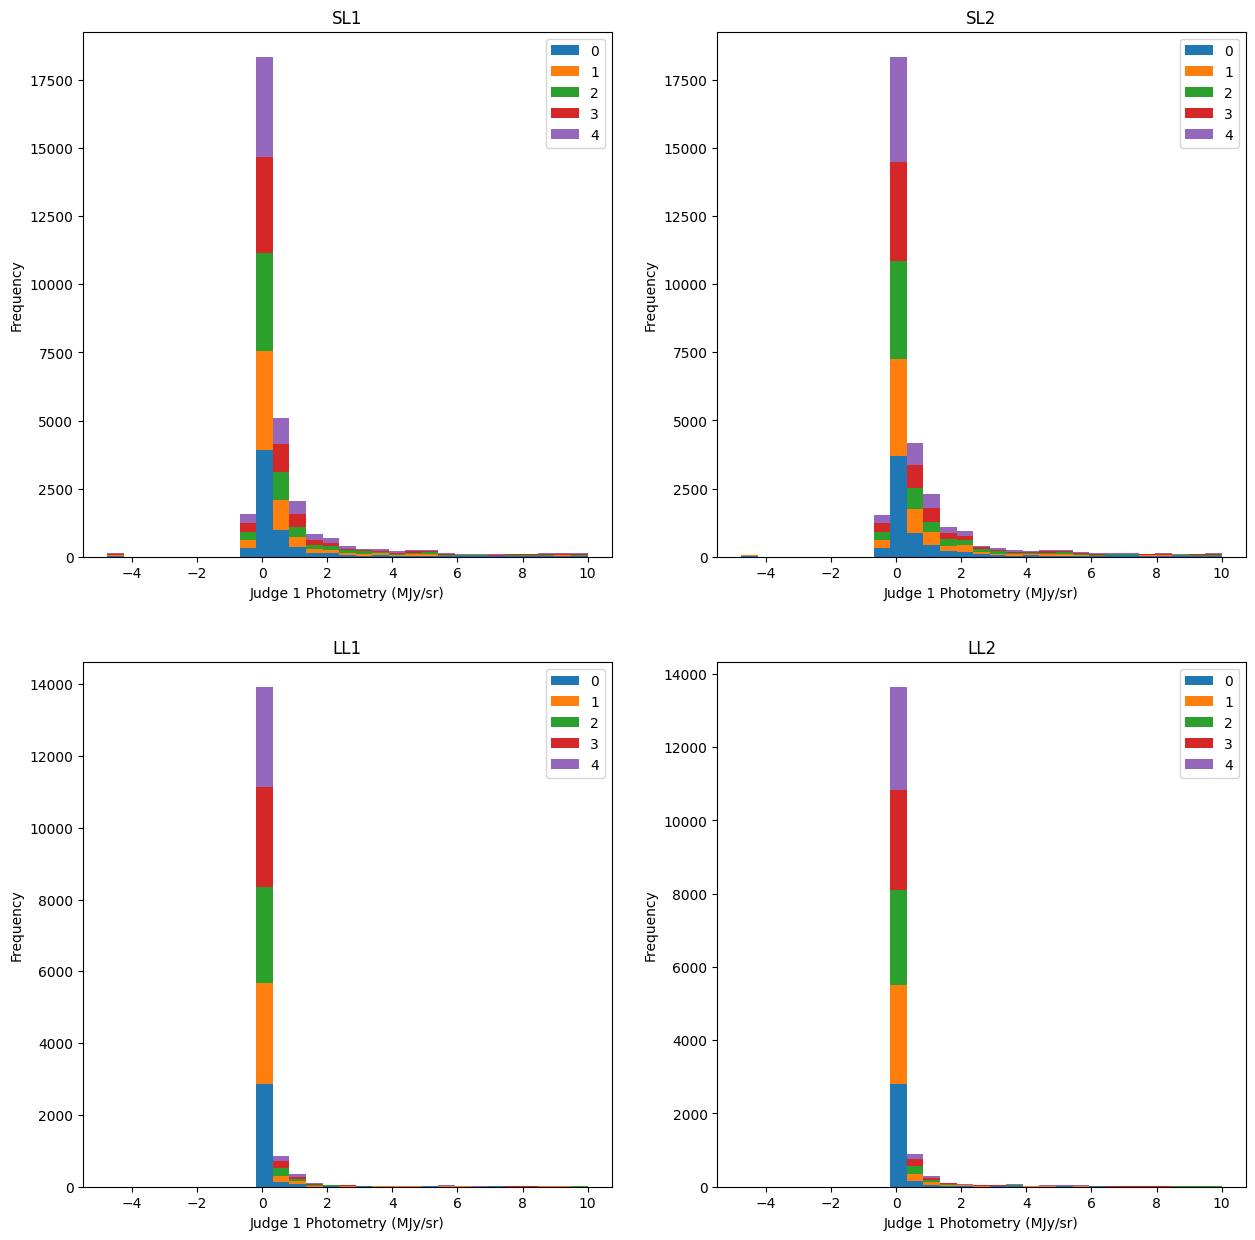

In [49]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
bin_num = 30

plt.subplot(2, 2, 1)
mj1s = [j1s[np.where((np.abs(j1s)<10)&(chnls==0)&(subs==1)&(shardids==i))] for i in range(sl_n_shards)]
pos_j1 = j1s[np.where(np.abs(j1s)<10)]
bins = np.linspace(np.min(pos_j1), np.max(pos_j1), bin_num)
hist, edges = np.histogram(pos_j1, bins=bins)
bin_centers = [np.mean((edges[i],edges[i+1])) for i in range(len(edges)-1)]
plt.hist(mj1s, bins=bins, stacked=True, label=range(sl_n_shards))
plt.legend()
plt.title('SL1')
plt.ylabel('Frequency')
plt.xlabel('Judge 1 Photometry (MJy/sr)')

plt.subplot(2, 2, 2)
mj1s = [j1s[np.where((np.abs(j1s)<10)&(chnls==0)&(subs==2)&(shardids==i))] for i in range(sl_n_shards)]
pos_j1 = j1s[np.where(np.abs(j1s)<10)]
bins = np.linspace(np.min(pos_j1), np.max(pos_j1), bin_num)
hist, edges = np.histogram(pos_j1, bins=bins)
bin_centers = [np.mean((edges[i],edges[i+1])) for i in range(len(edges)-1)]
plt.hist(mj1s, bins=bins, stacked=True, label=range(sl_n_shards))
plt.legend()
plt.title('SL2')
plt.ylabel('Frequency')
plt.xlabel('Judge 1 Photometry (MJy/sr)')

plt.subplot(2, 2, 3)
mj1s = [j1s[np.where((np.abs(j1s)<10)&(chnls==2)&(subs==1)&(shardids==i))] for i in range(ll_n_shards)]
pos_j1 = j1s[np.where(np.abs(j1s)<10)]
bins = np.linspace(np.min(pos_j1), np.max(pos_j1), bin_num)
hist, edges = np.histogram(pos_j1, bins=bins)
bin_centers = [np.mean((edges[i],edges[i+1])) for i in range(len(edges)-1)]
plt.hist(mj1s, bins=bins, stacked=True, label=range(ll_n_shards))
plt.legend()
plt.title('LL1')
plt.ylabel('Frequency')
plt.xlabel('Judge 1 Photometry (MJy/sr)')

plt.subplot(2, 2, 4)
mj1s = [j1s[np.where((np.abs(j1s)<10)&(chnls==2)&(subs==2)&(shardids==i))] for i in range(ll_n_shards)]
pos_j1 = j1s[np.where(np.abs(j1s)<10)]
bins = np.linspace(np.min(pos_j1), np.max(pos_j1), bin_num)
hist, edges = np.histogram(pos_j1, bins=bins)
bin_centers = [np.mean((edges[i],edges[i+1])) for i in range(len(edges)-1)]
plt.hist(mj1s, bins=bins, stacked=True, label=range(ll_n_shards))
plt.legend()
plt.title('LL2')
plt.ylabel('Frequency')
plt.xlabel('Judge 1 Photometry (MJy/sr)')

plt.savefig(plotpath+'judge_photometry/judge1_histograms_linear.pdf', format='pdf')
plt.show()

# Judge 2

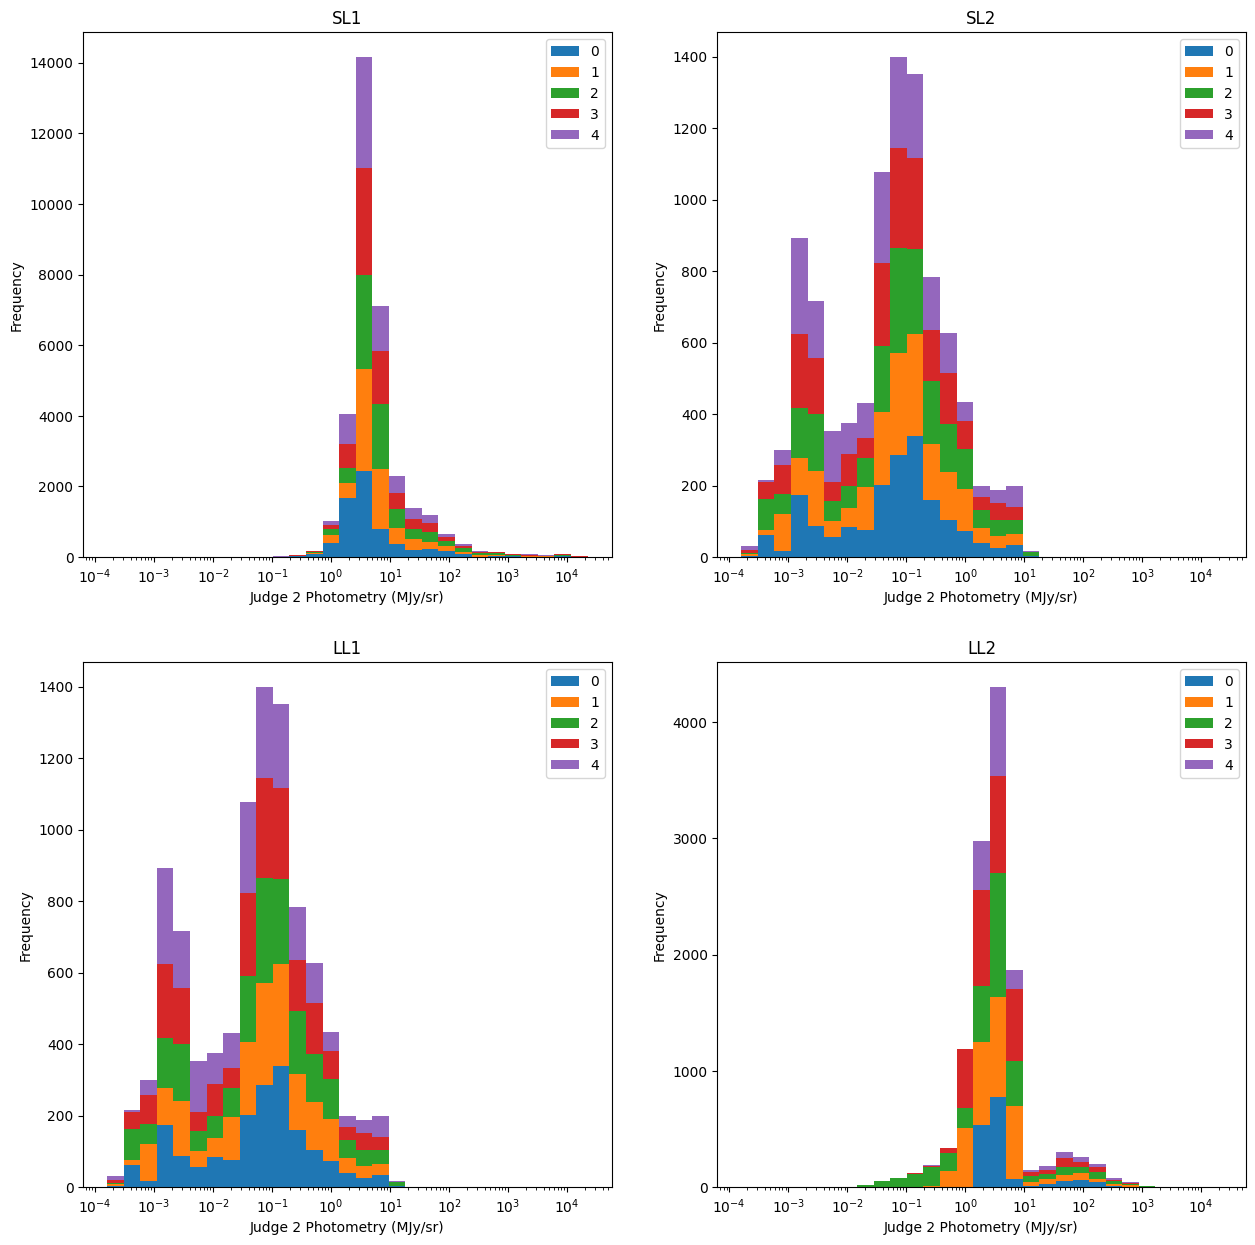

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
bin_num = 30

plt.subplot(2, 2, 1)
mj2s = [j2s[np.where((j2s>0)&(chnls==0)&(subs==1)&(shardids==i))] for i in range(sl_n_shards)]
pos_j2 = j2s[np.where(j2s>0)]
bins = 10**np.linspace(np.log10(np.min(pos_j2)), \
                       np.log10(np.max(pos_j2)), bin_num)
hist, edges = np.histogram(pos_j2, bins=bins)
bin_centers = [np.mean((edges[i],edges[i+1])) for i in range(len(edges)-1)]
plt.hist(mj2s, bins=bins, stacked=True, label=range(sl_n_shards))
plt.legend()
plt.title('SL1')
plt.gca().set_xscale("log")
plt.ylabel('Frequency')
plt.xlabel('Judge 2 Photometry (MJy/sr)')

plt.subplot(2, 2, 2)
mj2s = [j2s[np.where((j2s>0)&(chnls==0)&(subs==2)&(shardids==i))] for i in range(sl_n_shards)]
pos_j2 = j2s[np.where(j2s>0)]
bins = 10**np.linspace(np.log10(np.min(pos_j2)), \
                       np.log10(np.max(pos_j2)), bin_num)
hist, edges = np.histogram(pos_j2, bins=bins)
bin_centers = [np.mean((edges[i],edges[i+1])) for i in range(len(edges)-1)]
plt.hist(mj1s, bins=bins, stacked=True, label=range(sl_n_shards))
plt.legend()
plt.title('SL2')
plt.gca().set_xscale("log")
plt.ylabel('Frequency')
plt.xlabel('Judge 2 Photometry (MJy/sr)')

plt.subplot(2, 2, 3)
mj2s = [j2s[np.where((j2s>0)&(chnls==2)&(subs==1)&(shardids==i))] for i in range(ll_n_shards)]
pos_j2 = j2s[np.where(j2s>0)]
bins = 10**np.linspace(np.log10(np.min(pos_j2)), \
                       np.log10(np.max(pos_j2)), bin_num)
hist, edges = np.histogram(pos_j2, bins=bins)
bin_centers = [np.mean((edges[i],edges[i+1])) for i in range(len(edges)-1)]
plt.hist(mj1s, bins=bins, stacked=True, label=range(ll_n_shards))
plt.legend()
plt.title('LL1')
plt.gca().set_xscale("log")
plt.ylabel('Frequency')
plt.xlabel('Judge 2 Photometry (MJy/sr)')

plt.subplot(2, 2, 4)
mj2s = [j2s[np.where((j2s>0)&(chnls==2)&(subs==2)&(shardids==i))] for i in range(ll_n_shards)]
pos_j2 = j2s[np.where(j2s>0)]
bins = 10**np.linspace(np.log10(np.min(pos_j2)), \
                       np.log10(np.max(pos_j2)), bin_num)
hist, edges = np.histogram(pos_j2, bins=bins)
bin_centers = [np.mean((edges[i],edges[i+1])) for i in range(len(edges)-1)]
plt.hist(mj2s, bins=bins, stacked=True, label=range(ll_n_shards))
plt.legend()
plt.title('LL2')
plt.gca().set_xscale("log")
plt.ylabel('Frequency')
plt.xlabel('Judge 2 Photometry (MJy/sr)')

plt.savefig(plotpath+'judge_photometry/judge2_histograms_log.pdf', format='pdf')
plt.show()

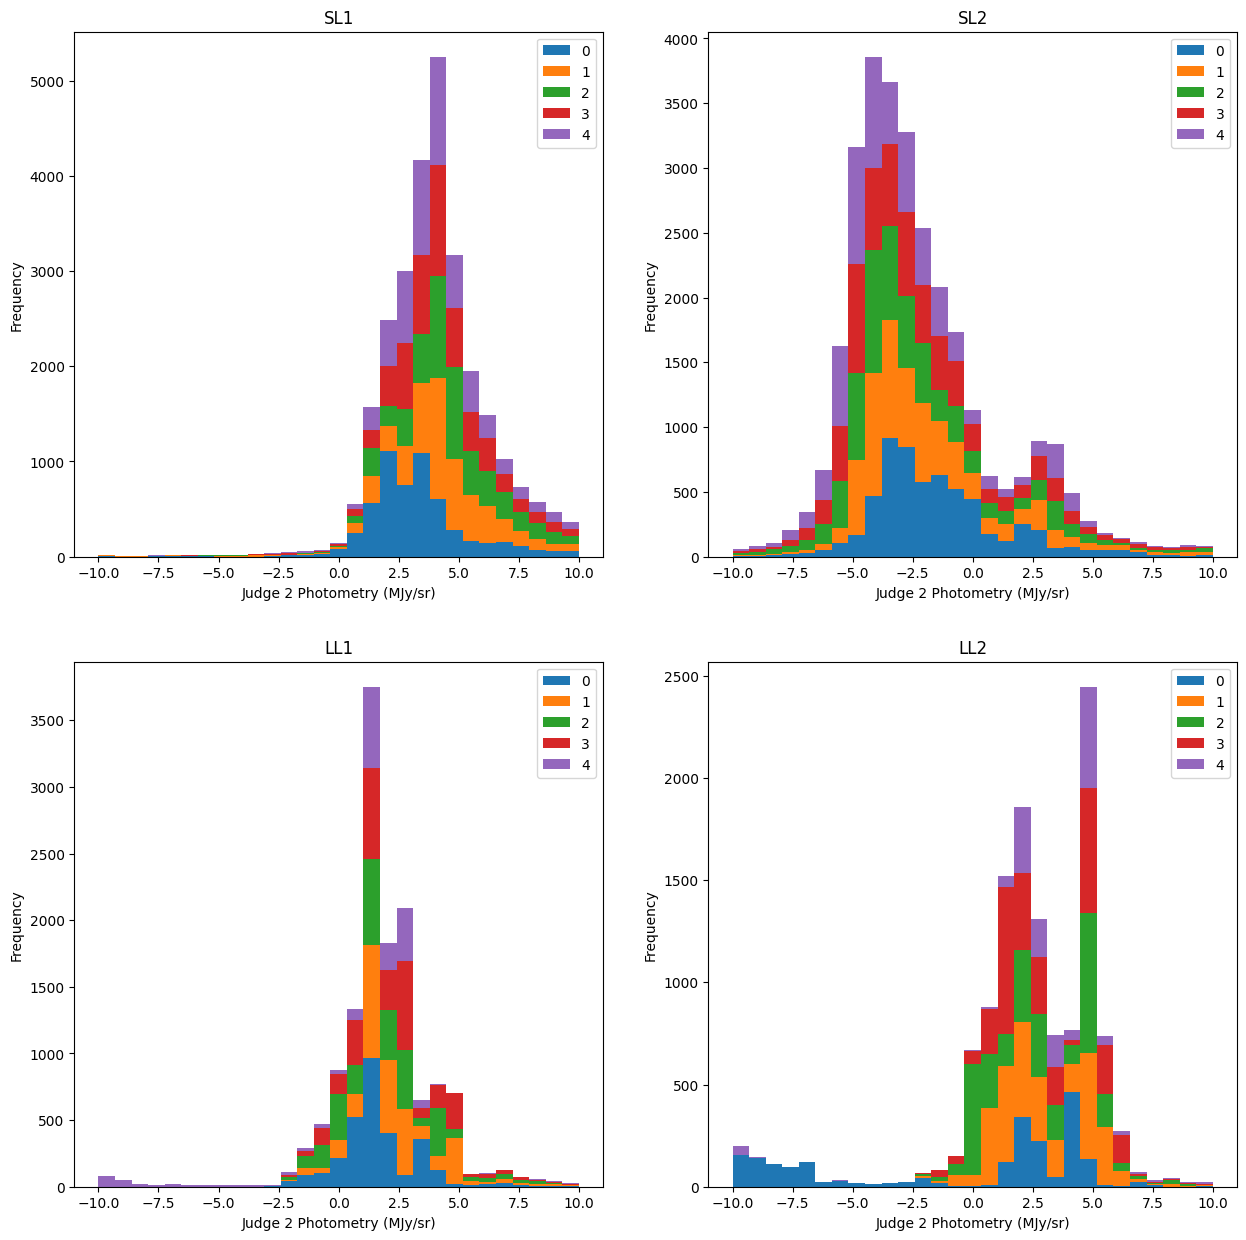

In [51]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
bin_num = 30

plt.subplot(2, 2, 1)
mj2s = [j2s[np.where((np.abs(j2s)<10)&(chnls==0)&(subs==1)&(shardids==i))] for i in range(sl_n_shards)]
pos_j2 = j2s[np.where(np.abs(j2s)<10)]
bins = np.linspace(np.min(pos_j2), np.max(pos_j2), bin_num)
hist, edges = np.histogram(pos_j2, bins=bins)
bin_centers = [np.mean((edges[i],edges[i+1])) for i in range(len(edges)-1)]
plt.hist(mj2s, bins=bins, stacked=True, label=range(sl_n_shards))
plt.legend()
plt.title('SL1')
plt.ylabel('Frequency')
plt.xlabel('Judge 2 Photometry (MJy/sr)')

plt.subplot(2, 2, 2)
mj2s = [j2s[np.where((np.abs(j2s)<10)&(chnls==0)&(subs==2)&(shardids==i))] for i in range(sl_n_shards)]
pos_j2 = j2s[np.where(np.abs(j2s)<10)]
bins = np.linspace(np.min(pos_j2), np.max(pos_j2), bin_num)
hist, edges = np.histogram(pos_j2, bins=bins)
bin_centers = [np.mean((edges[i],edges[i+1])) for i in range(len(edges)-1)]
plt.hist(mj2s, bins=bins, stacked=True, label=range(sl_n_shards))
plt.legend()
plt.title('SL2')
plt.ylabel('Frequency')
plt.xlabel('Judge 2 Photometry (MJy/sr)')

plt.subplot(2, 2, 3)
mj2s = [j2s[np.where((np.abs(j2s)<10)&(chnls==2)&(subs==1)&(shardids==i))] for i in range(ll_n_shards)]
pos_j2 = j2s[np.where(np.abs(j2s)<10)]
bins = np.linspace(np.min(pos_j2), np.max(pos_j2), bin_num)
hist, edges = np.histogram(pos_j2, bins=bins)
bin_centers = [np.mean((edges[i],edges[i+1])) for i in range(len(edges)-1)]
plt.hist(mj2s, bins=bins, stacked=True, label=range(ll_n_shards))
plt.legend()
plt.title('LL1')
plt.ylabel('Frequency')
plt.xlabel('Judge 2 Photometry (MJy/sr)')

plt.subplot(2, 2, 4)
mj2s = [j2s[np.where((np.abs(j2s)<10)&(chnls==2)&(subs==2)&(shardids==i))] for i in range(ll_n_shards)]
pos_j2 = j2s[np.where(np.abs(j2s)<10)]
bins = np.linspace(np.min(pos_j2), np.max(pos_j2), bin_num)
hist, edges = np.histogram(pos_j2, bins=bins)
bin_centers = [np.mean((edges[i],edges[i+1])) for i in range(len(edges)-1)]
plt.hist(mj2s, bins=bins, stacked=True, label=range(ll_n_shards))
plt.legend()
plt.title('LL2')
plt.ylabel('Frequency')
plt.xlabel('Judge 2 Photometry (MJy/sr)')

plt.savefig(plotpath+'judge_photometry/judge2_histograms_linear.pdf', format='pdf')
plt.show()

# Judge 2 Binned Spectra for Judge 1-selected Shards

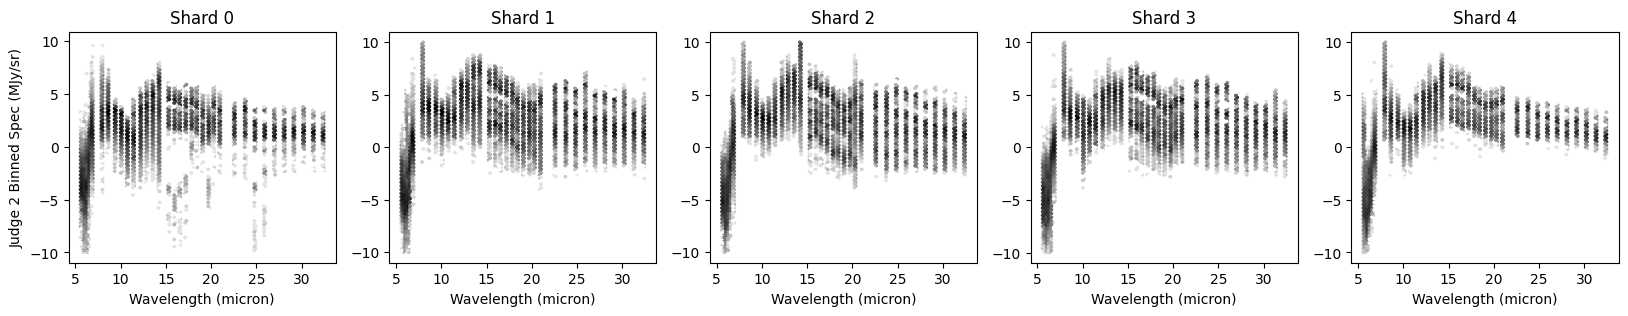

In [26]:
j1cut = 0.1 # MJy/sr
j2lim = 10 # for plotting purposes, MJy/sr

# The way this is written currently assumes that SL and LL have the same number of shards

lam_dict = [
    np.load(SimlaVar().simlapath+'storage/sl2_binlam.npy'),
    np.load(SimlaVar().simlapath+'storage/sl1_binlam.npy'),
    np.load(SimlaVar().simlapath+'storage/ll2_binlam.npy'),
    np.load(SimlaVar().simlapath+'storage/ll1_binlam.npy'),
]

j1sel_j2specs = [[j2_specs[np.where((np.abs(j1s)<=j1cut)&(np.max(np.abs(j2_specs), axis=1)<=j2lim) \
                                    &(chnls==0)&(subs==2)&(shardids==i))], \
                  j2_specs[np.where((np.abs(j1s)<=j1cut)&(np.max(np.abs(j2_specs), axis=1)<=j2lim) \
                                    &(chnls==0)&(subs==1)&(shardids==i))], \
                  j2_specs[np.where((np.abs(j1s)<=j1cut)&(np.max(np.abs(j2_specs), axis=1)<=j2lim) \
                                    &(chnls==2)&(subs==2)&(shardids==i))], \
                  j2_specs[np.where((np.abs(j1s)<=j1cut)&(np.max(np.abs(j2_specs), axis=1)<=j2lim) \
                                    &(chnls==2)&(subs==1)&(shardids==i))]] \
                 for i in range(sl_n_shards)]

fig, axs = plt.subplots(1, sl_n_shards, figsize=(20, 3))
for i in range(sl_n_shards):
    plt.subplot(1, sl_n_shards, i+1)

    x, y = [], []
    for order in range(4):
        ydata = j1sel_j2specs[i][order]
        xdata = np.ones_like(ydata)*lam_dict[order]
        y.extend(ydata)
        x.extend(xdata)
    x, y = np.asarray(x).flatten(), np.asarray(y).flatten()
            
    plt.hexbin(x=x, y=y, cmap='gray_r', bins='log', mincnt=1, gridsize=100)

    plt.title('Shard '+str(i))
    plt.xlabel('Wavelength (micron)')
    if i == 0: plt.ylabel('Judge 2 Binned Spec (MJy/sr)')

plt.savefig(plotpath+'judge_photometry/j1-selected_judge2_spectra.pdf', format='pdf')
plt.show()